In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest


In [186]:
df = pd.read_csv("C:\\Users\\Harshit\\Downloads\\Loan 2.csv")

In [187]:
df.shape

(30000, 24)

In [188]:
df.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0  ...        809.44               0                    NaN          746   
1  ...        780.40               0            Unpossessed          608   
2  ...        833.15               0            Unpossessed          546   
3  ...        832.70               1            Unpossessed          890   
4  ...        745.55               1                 Active          715   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05              4             Rural             1   
1       4952.91              2             Rural             1   
2        988.19              2             Urban             0   
3           NaN              2        Semi-Urban             1   
4       2614.77              4        Semi-Urban             1   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28  

[5 rows x 24 columns]

In [189]:
df.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [190]:
df.describe()

Age  Income (USD)  Loan Amount Request (USD)  \
count  30000.000000  2.542400e+04               30000.000000   
mean      40.092300  2.630574e+03               88826.333855   
std       16.045129  1.126272e+04               59536.949605   
min       18.000000  3.777000e+02                6048.240000   
25%       25.000000  1.650457e+03               41177.755000   
50%       40.000000  2.222435e+03               75128.075000   
75%       55.000000  3.090593e+03              119964.605000   
max       65.000000  1.777460e+06              621497.820000   

       Current Loan Expenses (USD)    Dependents  Credit Score  \
count                 29828.000000  27507.000000  28297.000000   
mean                    400.936876      2.253027    739.885381   
std                     242.545375      0.951162     72.163846   
min                    -999.000000      1.000000    580.000000   
25%                     247.667500      2.000000    681.880000   
50%                     375.205000      2.000000    739.820000   
75%                     521.292500      3.000000    799.120000   
max                    3840.880000     14.000000    896.260000   

       No. of Defaults   Property ID  Property Age  Property Type  \
count     30000.000000  30000.000000  2.515000e+04   30000.000000   
mean          0.193933    501.934700  2.631119e+03       2.460067   
std           0.395384    288.158086  1.132268e+04       1.118562   
min           0.000000      1.000000  3.777000e+02       1.000000   
25%           0.000000    251.000000  1.650450e+03       1.000000   
50%           0.000000    504.000000  2.223250e+03       2.000000   
75%           0.000000    751.000000  3.091408e+03       3.000000   
max           1.000000    999.000000  1.777460e+06       4.000000   

       Co-Applicant  Property Price  Loan Sanction Amount (USD)  
count  30000.000000    3.000000e+04                29660.000000  
mean      -4.743867    1.317597e+05                47649.342208  
std       74.614593    9.354955e+04                48221.146686  
min     -999.000000   -9.990000e+02                 -999.000000  
25%        1.000000    6.057216e+04                    0.000000  
50%        1.000000    1.099936e+05                35209.395000  
75%        1.000000    1.788807e+05                74261.250000  
max        1.000000    1.077967e+06               481907.320000

In [191]:
df.isnull()

Customer ID   Name  Gender    Age  Income (USD)  Income Stability  \
0            False  False   False  False         False             False   
1            False  False   False  False         False             False   
2            False  False   False  False         False             False   
3            False  False   False  False          True             False   
4            False  False   False  False         False             False   
...            ...    ...     ...    ...           ...               ...   
29995        False  False   False  False         False             False   
29996        False  False   False  False         False             False   
29997        False  False   False  False          True             False   
29998        False  False   False  False         False             False   
29999        False  False   False  False         False             False   

       Profession  Type of Employment  Location  Loan Amount Request (USD)  \
0           False               False     False                      False   
1           False                True     False                      False   
2           False                True     False                      False   
3           False                True     False                      False   
4           False               False     False                      False   
...           ...                 ...       ...                        ...   
29995       False               False     False                      False   
29996       False               False     False                      False   
29997       False               False     False                      False   
29998       False               False     False                      False   
29999       False                True     False                      False   

       ...  Credit Score  No. of Defaults  Has Active Credit Card  \
0      ...         False            False                    True   
1      ...         False            False                   False   
2      ...         False            False                   False   
3      ...         False            False                   False   
4      ...         False            False                   False   
...    ...           ...              ...                     ...   
29995  ...         False            False                   False   
29996  ...         False            False                   False   
29997  ...          True            False                   False   
29998  ...         False            False                   False   
29999  ...         False            False                   False   

       Property ID  Property Age  Property Type  Property Location  \
0            False         False          False              False   
1            False         False          False              False   
2            False         False          False              False   
3            False          True          False              False   
4            False         False          False              False   
...            ...           ...            ...                ...   
29995        False         False          False              False   
29996        False         False          False              False   
29997        False          True          False              False   
29998        False         False          False              False   
29999        False         False          False              False   

       Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0             False           False                       False  
1             False           False                       False  
2             False           False                       False  
3             False           False                       False  
4             False           False                       False  
...             ...             ...                         ...  
29995         False      

In [192]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [193]:
df['Income (USD)'].fillna(df['Income (USD)'].mean(), inplace=True)
income_stats = df['Income (USD)'].describe()
print(income_stats)

count    3.000000e+04
mean     2.630574e+03
std      1.036820e+04
min      3.777000e+02
25%      1.743305e+03
50%      2.473470e+03
75%      2.869142e+03
max      1.777460e+06
Name: Income (USD), dtype: float64


In [194]:
profession_mode = df['Profession'].mode()
if len(profession_mode) > 0:
    df['Profession'] = df['Profession'].fillna(profession_mode.iloc[0])
df['Type of Employment'] = df.groupby(['Profession', 'Income (USD)'])['Type of Employment'].transform(lambda x: x.fillna(x.mode().iloc[0] if len(x.mode()) > 0 else x.mean()))


In [195]:
mode_value = int(df['Dependents'].mode().iloc[0])
df['Dependents'].fillna(mode_value, inplace=True)

In [196]:
df['Has Active Credit Card'].fillna('Unknown', inplace=True)

In [197]:
missing_gender_indices = df['Gender'].isnull()
df.loc[missing_gender_indices, 'Gender'] = 'Other'


In [198]:
mode_imputer = df.groupby('Property Price')['Loan Sanction Amount (USD)'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['Loan Sanction Amount (USD)'].fillna(mode_imputer, inplace=True)

IndexError: single positional indexer is out-of-bounds

In [199]:
df.corr()

C:\Users\Harshit\AppData\Local\Temp\ipykernel_21488\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Age  Income (USD)  \
Age                          1.000000     -0.009392   
Income (USD)                -0.009392      1.000000   
Loan Amount Request (USD)   -0.010450      0.046155   
Current Loan Expenses (USD) -0.023684      0.050211   
Dependents                  -0.079574      0.004799   
Credit Score                 0.129760      0.011927   
No. of Defaults              0.003573     -0.001967   
Property ID                 -0.012358     -0.007493   
Property Age                -0.010341      1.000000   
Property Type                0.002196      0.008960   
Co-Applicant                 0.000632      0.000404   
Property Price              -0.009819      0.046484   
Loan Sanction Amount (USD)   0.008112      0.034997   

                             Loan Amount Request (USD)  \
Age                                          -0.010450   
Income (USD)                                  0.046155   
Loan Amount Request (USD)                     1.000000   
Current Loan Expenses (USD)                   0.682248   
Dependents                                    0.039394   
Credit Score                                  0.178260   
No. of Defaults                               0.000088   
Property ID                                  -0.008426   
Property Age                                  0.049976   
Property Type                                 0.003802   
Co-Applicant                                  0.001864   
Property Price                                0.948350   
Loan Sanction Amount (USD)                    0.726408   

                             Current Loan Expenses (USD)  Dependents  \
Age                                            -0.023684   -0.079574   
Income (USD)                                    0.050211    0.004799   
Loan Amount Request (USD)                       0.682248    0.039394   
Current Loan Expenses (USD)                     1.000000    0.043807   
Dependents                                      0.043807    1.000000   
Credit Score                                    0.114950   -0.085978   
No. of Defaults                                 0.002767    0.008420   
Property ID                                    -0.014519    0.001881   
Property Age                                    0.054682    0.005098   
Property Type                                   0.014812   -0.008387   
Co-Applicant                                    0.002130    0.003115   
Property Price                                  0.648636    0.035983   
Loan Sanction Amount (USD)                      0.485070    0.004788   

                             Credit Score  No. of Defaults  Property ID  \
Age                              0.129760         0.003573    -0.012358   
Income (USD)                     0.011927        -0.001967    -0.007493   
Loan Amount Request (USD)        0.178260         0.000088    -0.008426   
Current Loan Expenses (USD)      0.114950         0.002767    -0.014519   
Dependents                      -0.085978         0.008420     0.001881   
Credit Score                     1.000000         0.006647    -0.006062   
No. of Defaults                  0.006647         1.000000    -0.001282   
Property ID                     -0.006062        -0.001282     1.000000   
Property Age                     0.012959        -0.002093    -0.008075   
Property Type                    0.009116         0.000477     0.008658   
Co-Applicant                     0.009611        -0.008191     0.008151   
Property Price                   0.170829         0.001718    -0.011890   
Loan Sanction Amount (USD)       0.369450        -0.004330    -0.009751   

                             Property Age  Property Type  Co-Applicant  \
Age                             -0.010341       0.002196      0.000632   
Income (USD)                     1.000000       0.008960      0.000404   
Loan Amount Request (USD)        0.049976       0.003802      0.001864   
Current Loan Expenses (USD)      0.054682       0.014812      0.002130   
Dependents          

C:\Users\Harshit\AppData\Local\Temp\ipykernel_21488\1437036863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


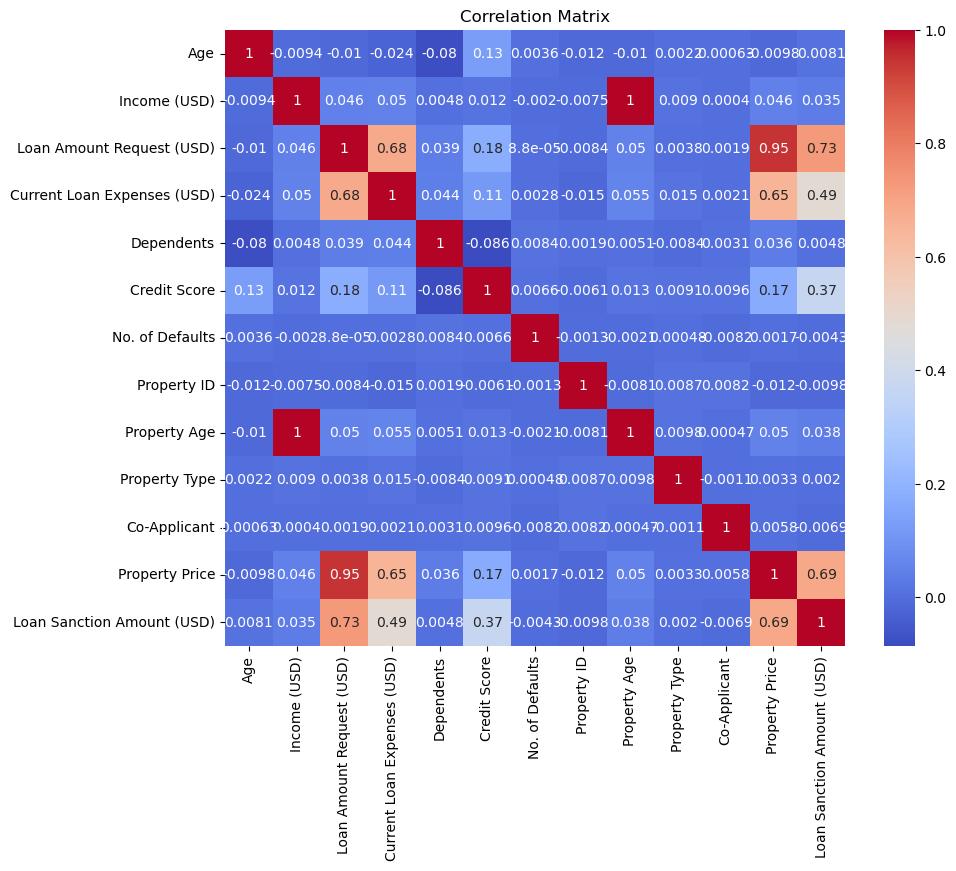

In [200]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [201]:
X = df[['Property Location', 'Property Price', 'Property Type']]
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=['Property Location', 'Property Price', 'Property Type'])
df[['Property Location', 'Property Price', 'Property Type']] = X_imputed_df
print(df.head())

  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56   1933.050000              Low   
1     C-33999  America Calderone      M   32   4952.910000              Low   
2      C-3770      Rosetta Verne      F   65    988.190000             High   
3     C-26480         Zoe Chitty      F   65   2630.574417             High   
4     C-23459       Afton Venema      F   31   2614.770000              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit C

In [202]:
income_mean_credit_score = df.groupby('Income (USD)')['Credit Score'].mean()
df['Credit Score'].fillna(income_mean_credit_score, inplace=True)

In [203]:
df['Income (USD)'].fillna(df['Income (USD)'].mean(), inplace=True)
mean_expenses_by_income = df.groupby('Income (USD)')['Current Loan Expenses (USD)'].mean()
mean_expenses_dict = mean_expenses_by_income.to_dict()
df['Current Loan Expenses (USD)'].fillna(df['Income (USD)'].map(mean_expenses_dict), inplace=True)
print(df['Current Loan Expenses (USD)'].isna().sum())



107


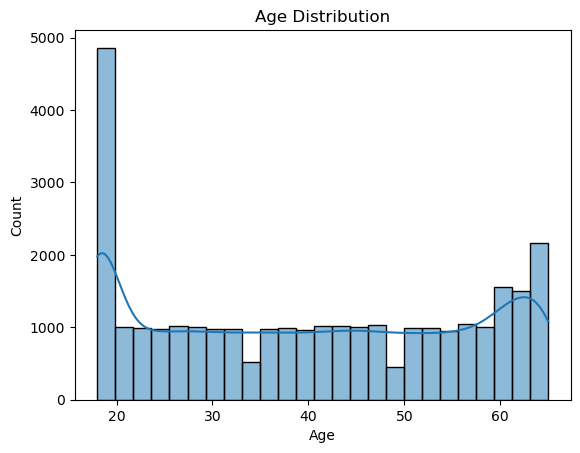

In [204]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

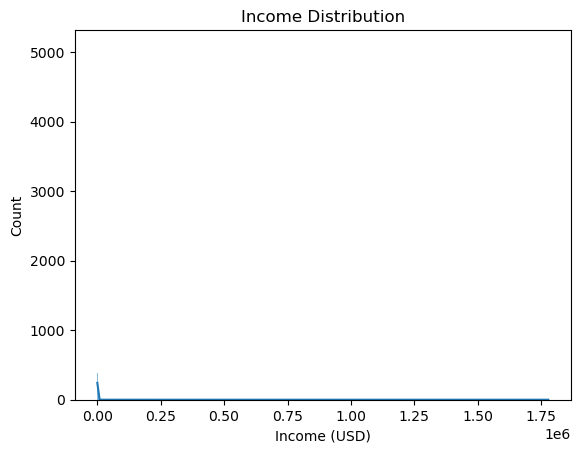

In [205]:
sns.histplot(df['Income (USD)'], kde=True)
plt.title("Income Distribution")
plt.show()

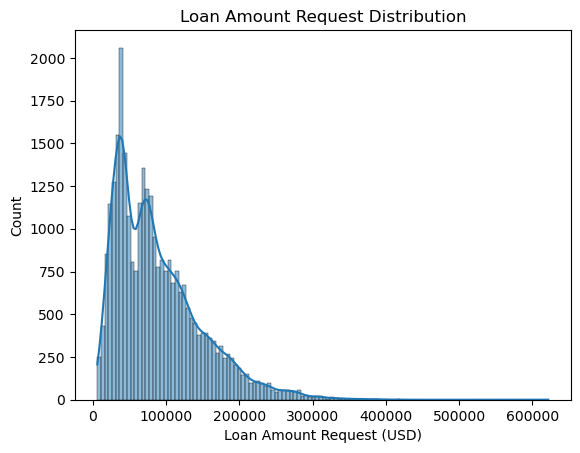

In [206]:
sns.histplot(df['Loan Amount Request (USD)'], kde=True)
plt.title("Loan Amount Request Distribution")
plt.show()

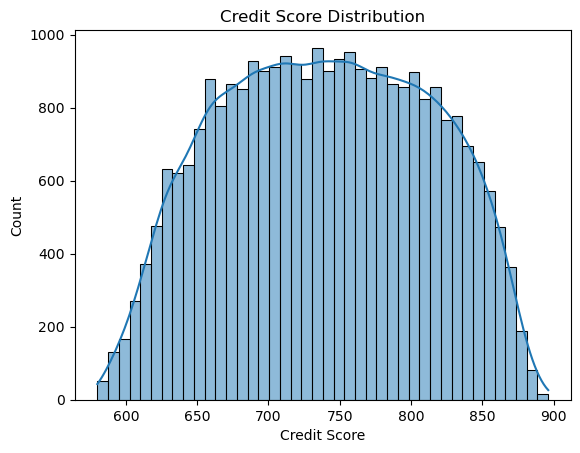

In [207]:
sns.histplot(df['Credit Score'], kde=True)
plt.title("Credit Score Distribution")
plt.show()


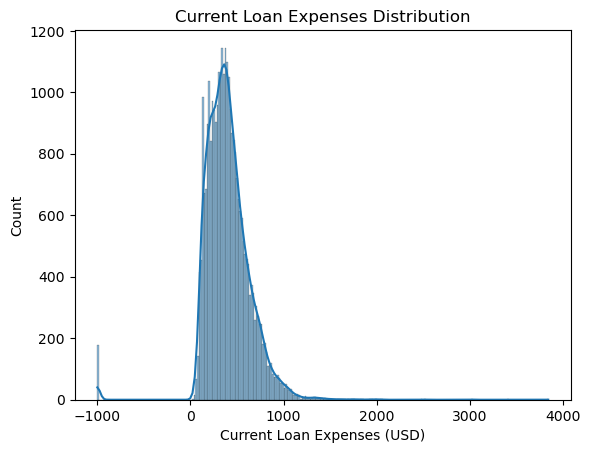

In [208]:
sns.histplot(df['Current Loan Expenses (USD)'], kde=True)
plt.title("Current Loan Expenses Distribution")
plt.show()


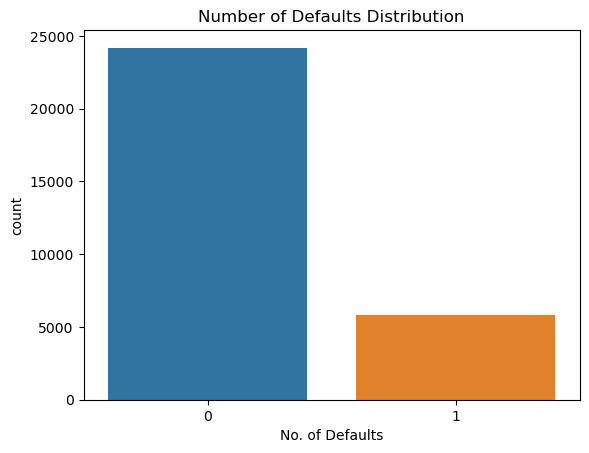

In [209]:
sns.countplot(x='No. of Defaults', data=df)
plt.title("Number of Defaults Distribution")
plt.show()


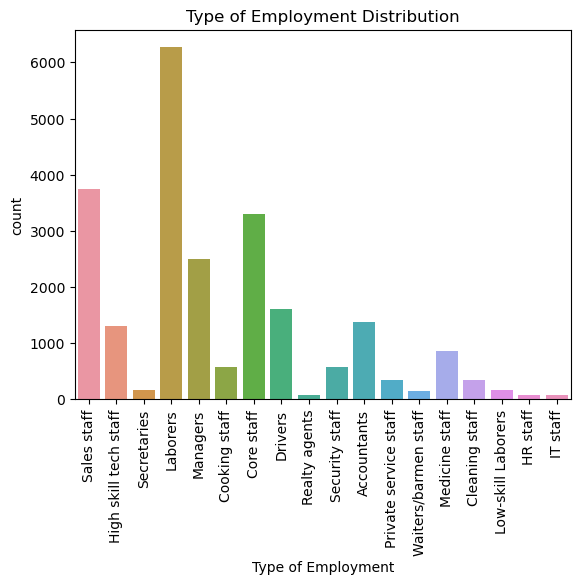

In [210]:
sns.countplot(x='Type of Employment', data=df)
plt.title("Type of Employment Distribution")
plt.xticks(rotation=90)
plt.show()


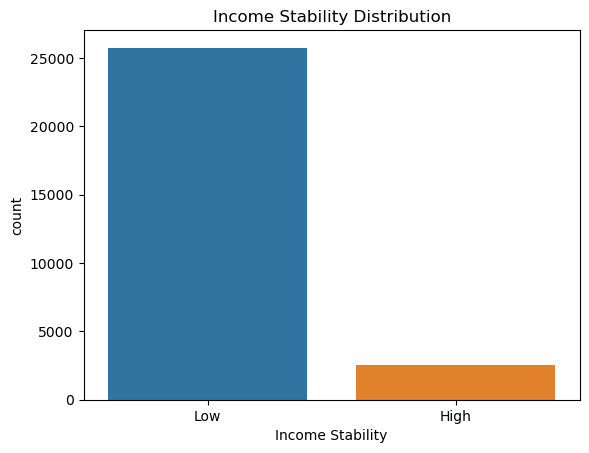

In [211]:
sns.countplot(x='Income Stability', data=df)
plt.title("Income Stability Distribution")
plt.show()


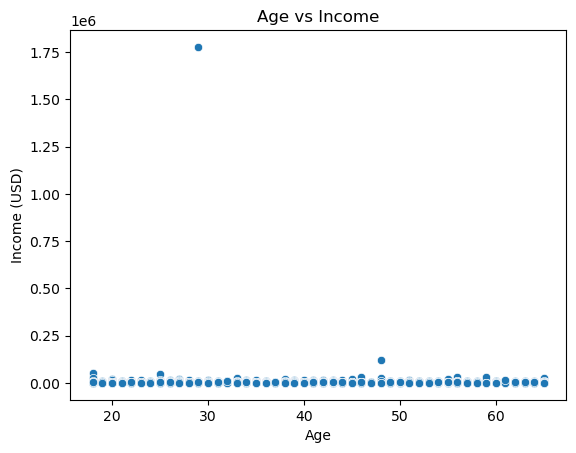

In [212]:
sns.scatterplot(x='Age', y='Income (USD)', data=df)
plt.title("Age vs Income")
plt.show()

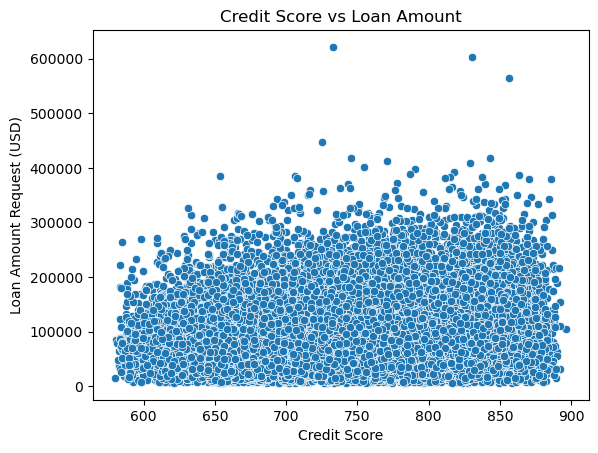

In [213]:
sns.scatterplot(x='Credit Score', y='Loan Amount Request (USD)', data=df)
plt.title("Credit Score vs Loan Amount")
plt.show()

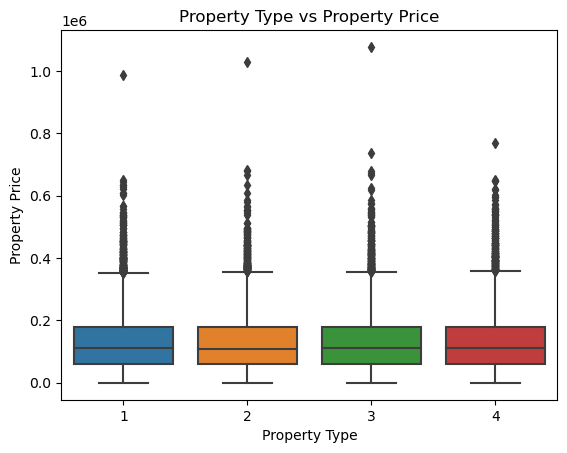

In [214]:
sns.boxplot(x='Property Type', y='Property Price', data=df)
plt.title("Property Type vs Property Price")
plt.show()

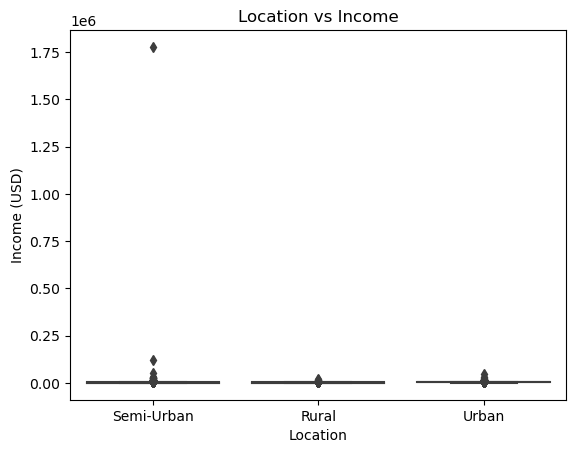

In [215]:
sns.boxplot(x='Location', y='Income (USD)', data=df)
plt.title("Location vs Income")
plt.show()

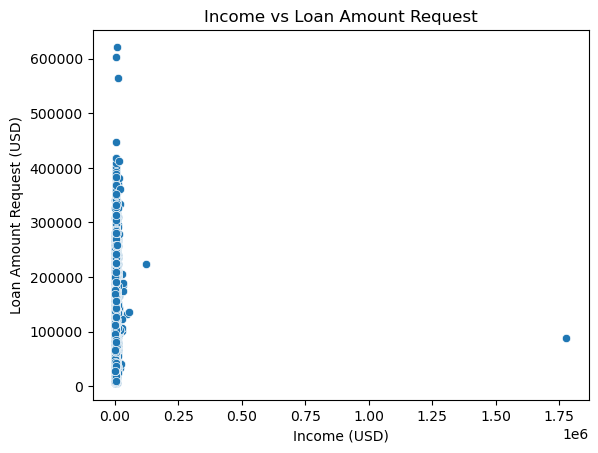

In [216]:
sns.scatterplot(x='Income (USD)', y='Loan Amount Request (USD)', data=df)
plt.title("Income vs Loan Amount Request")
plt.show()


In [217]:
income_avg = 2630.57
income_std = 10368.20
income_min = 377.70
income_max =1777460.00

Q1 = income_avg - (income_std * 0.67)  
Q2 = income_avg 
Q3 = income_avg + (income_std * 0.67)

expense_type_1_y_min = Q1 * 0.2
expense_type_1_y_max = Q3 * 0.3
expense_type_1_n_min = Q1 * 0.1
expense_type_1_n_max = Q2 * 0.2

expense_type_2_y_min = Q1 * 0.3
expense_type_2_y_max = Q3 * 0.4
expense_type_2_n_min = Q1 * 0.2
expense_type_2_n_max = Q2 * 0.3

def generate_expense(income, y_min, y_max):
  if income <= Q1:
    return np.random.uniform(expense_type_1_n_min, expense_type_1_n_max)
  elif income <= Q2:
    return np.random.uniform(y_min, y_max)
  else:
    return np.random.uniform(y_min, y_max)

df['Expense_Type_1'] = df['Income (USD)'].apply(lambda x: generate_expense(x, expense_type_1_y_min, expense_type_1_y_max))
df['Expense_Type_2'] = df['Income (USD)'].apply(lambda x: generate_expense(x, expense_type_2_y_min, expense_type_2_y_max))

print(df[['Expense_Type_1', 'Expense_Type_2']].head())


   Expense_Type_1  Expense_Type_2
0     1129.472359     -793.027711
1       64.900795     -109.959898
2     -805.543810     1217.508835
3     1968.779060     2646.379768
4     2187.285751     1431.001129


In [218]:
df['Expense_Type_1'] = df['Income (USD)'].apply(lambda x: generate_expense(x, expense_type_1_y_min, expense_type_1_y_max))
df['Expense_Type_2'] = df['Income (USD)'].apply(lambda x: generate_expense(x, expense_type_2_y_min, expense_type_2_y_max))


In [219]:
def calculate_savings(row):
    income = row['Income (USD)']
    expense_type_1 = row['Expense_Type_1']
    expense_type_2 = row['Expense_Type_2']
    expense_value = row['Current Loan Expenses (USD)']
    
    if expense_type_1 == 'y':
        return income - expense_value - row['Current Loan Expenses (USD)']
    elif expense_type_2 == 'y':
        return income - expense_value - row['Current Loan Expenses (USD)']
    else:
        return income - row['Current Loan Expenses (USD)']

df['Savings'] = df.apply(calculate_savings, axis=1)

print(df.head())  

  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56   1933.050000              Low   
1     C-33999  America Calderone      M   32   4952.910000              Low   
2      C-3770      Rosetta Verne      F   65    988.190000             High   
3     C-26480         Zoe Chitty      F   65   2630.574417             High   
4     C-23459       Afton Venema      F   31   2614.770000              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Property ID Property Age Property Type  Property

In [220]:
df['Savings'] = df.apply(calculate_savings, axis=1)


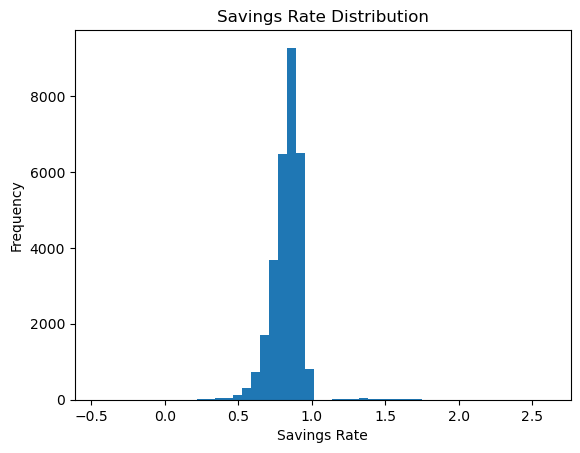

In [221]:
df['Savings_Rate'] = df['Savings'] / df['Income (USD)']

plt.hist(df['Savings_Rate'], bins=50)
plt.xlabel('Savings Rate')
plt.ylabel('Frequency')
plt.title('Savings Rate Distribution')
plt.show()

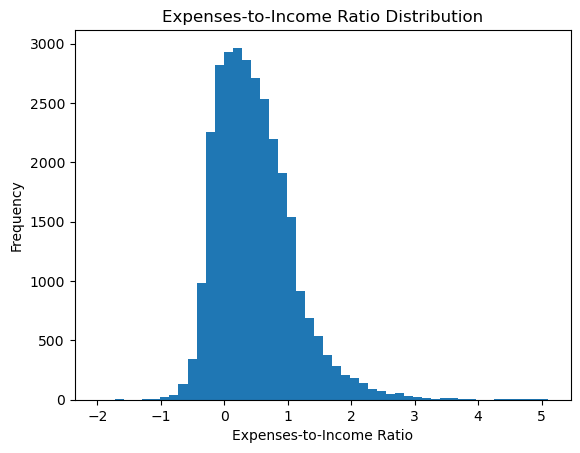

In [222]:
df['Expenses_to_Income'] = df['Expense_Type_1'] / df['Income (USD)']
plt.hist(df['Expenses_to_Income'], bins=50)
plt.xlabel('Expenses-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Expenses-to-Income Ratio Distribution')
plt.show()

In [223]:
Q1 = df["Income (USD)"].quantile(0.25)
Q3 = df["Income (USD)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_income_iqr = df[(df["Income (USD)"] < lower_bound) | (df["Income (USD)"] > upper_bound)]

print(outliers_income_iqr)

      Customer ID               Name Gender  Age  Income (USD)  \
1         C-33999  America Calderone      M   32       4952.91   
27        C-44863     Gerard Forsman      F   18       5350.94   
36        C-21055    Travis Priester      F   61       5302.28   
39        C-24451     Margareta Wind      M   18       7885.56   
41        C-48527       Mana Chattin      F   54       5330.72   
...           ...                ...    ...  ...           ...   
29892     C-22791       Ranee Faunce      M   18       5074.06   
29904      C-5271     Londa Eisenman      M   60       6685.40   
29913     C-40023      Zoraida Verde      M   29       4665.26   
29986     C-36230       Krystin Weir      M   32       8308.27   
29995     C-43723  Angelyn Clevenger      M   38       4969.41   

      Income Stability            Profession Type of Employment    Location  \
1                  Low               Working                NaN  Semi-Urban   
27                 Low  Commercial associate     

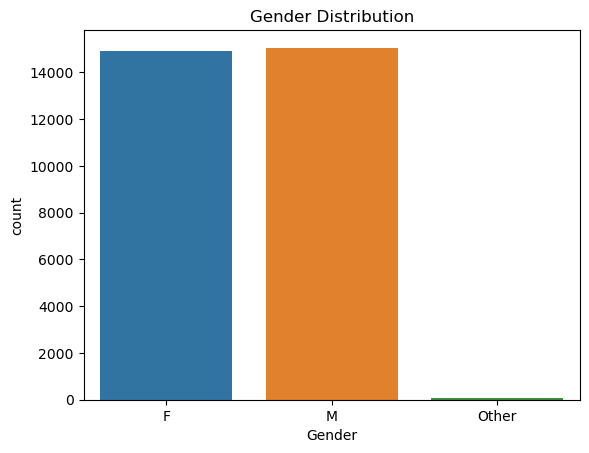

In [224]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

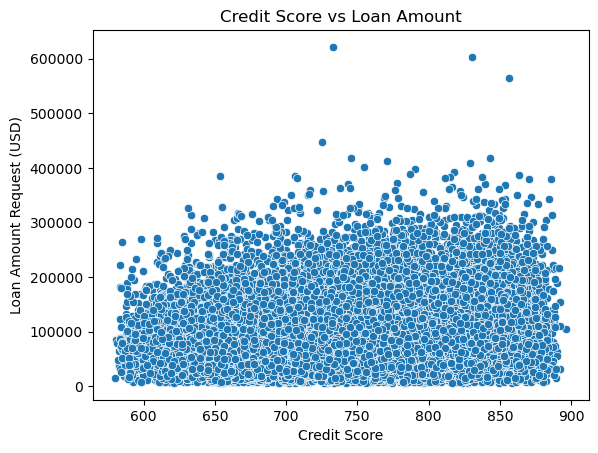

In [225]:
sns.scatterplot(x='Credit Score', y='Loan Amount Request (USD)', data=df)
plt.title("Credit Score vs Loan Amount")
plt.show()

C:\Users\Harshit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


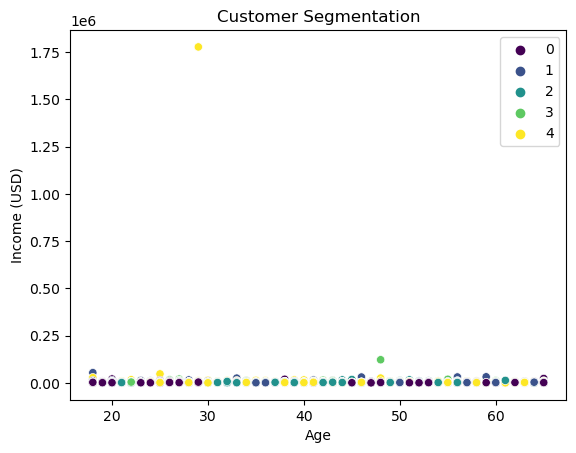

In [226]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
columns_to_use = ['Age', 'Income (USD)', 'Credit Score', 'Property Age', 'Property Price']

imputer = SimpleImputer(strategy='mean')
df[columns_to_use] = imputer.fit_transform(df[columns_to_use])

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df[columns_to_use])
labels = kmeans.labels_


sns.scatterplot(x='Age', y='Income (USD)', hue=labels, palette='viridis', data=df)
plt.title("Customer Segmentation")

plt.show()


In [227]:
from scipy import stats

z_scores = np.abs(stats.zscore(df["Loan Amount Request (USD)"]))

outliers_loan_amount = df[z_scores > 3]

print("Outliers in Loan Amount Request (USD):", outliers_loan_amount)


Outliers in Loan Amount Request (USD):       Customer ID                Name Gender   Age  Income (USD)  \
164       C-46327  Minerva Straughter      M  38.0       2021.12   
199       C-48323       Julius Gitlin      M  22.0       8556.16   
215       C-16868    Earlie Fleischer      M  64.0       5939.78   
225       C-48171         Fanny Leeds      M  18.0       3883.84   
247       C-34512        Melonie Pare      M  52.0       3019.22   
...           ...                 ...    ...   ...           ...   
29615     C-21328   Princess Bettcher      M  18.0       3893.55   
29658     C-40788       Lolita Adkins      F  53.0       4777.81   
29794     C-44334     Albertina Sayre      M  62.0       3685.22   
29904      C-5271      Londa Eisenman      M  60.0       6685.40   
29918      C-9504           Alaina Au      F  64.0       3483.69   

      Income Stability            Profession     Type of Employment  \
164                Low               Working            Sales staff   
19

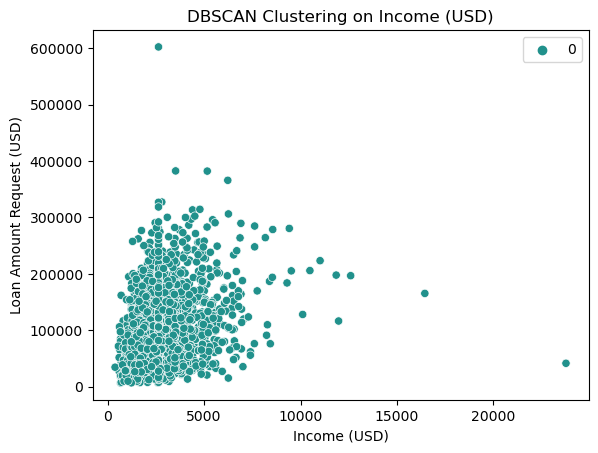

In [228]:
from sklearn.cluster import DBSCAN

df_sample = df.sample(frac=0.1, random_state=42)
imputer = SimpleImputer(strategy='mean')
df_sample['Income (USD)'] = imputer.fit_transform(df_sample[['Income (USD)']])

dbscan = DBSCAN(eps=10000, min_samples=10)
dbscan.fit(df_sample[['Income (USD)']])
outliers_income_dbscan = df_sample[dbscan.labels_ == -1]

sns.scatterplot(x='Income (USD)', y='Loan Amount Request (USD)', hue=dbscan.labels_, palette='viridis', data=df_sample)
plt.title("DBSCAN Clustering on Income (USD)")
plt.show()


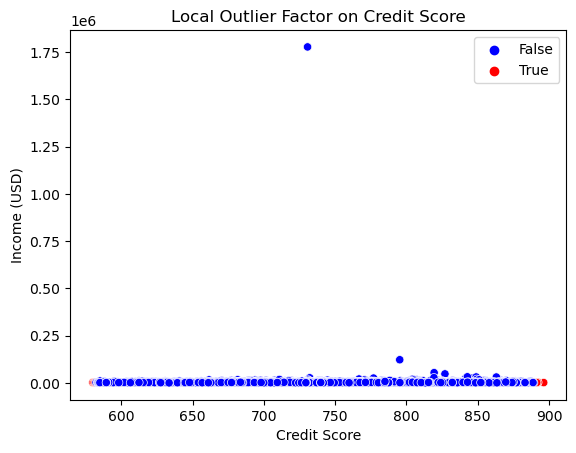

In [229]:
from sklearn.neighbors import LocalOutlierFactor

imputer = SimpleImputer(strategy='mean')
df['Credit Score'] = imputer.fit_transform(df[['Credit Score']])
clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred = clf.fit_predict(df[['Credit Score']])
scores_pred = clf.negative_outlier_factor_

outliers_credit_score = df[y_pred == -1]

sns.scatterplot(x='Credit Score', y='Income (USD)', hue=(y_pred == -1), palette={True: 'red', False: 'blue'}, data=df)
plt.title("Local Outlier Factor on Credit Score")
plt.show()


In [230]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0).fit(df[["Property Price"]])

outliers_property_price = df[clf.predict(df[["Property Price"]]) == -1]

print("Outliers in Property Price:", outliers_property_price)

Outliers in Property Price:       Customer ID                Name Gender   Age  Income (USD)  \
6         C-23855    Nathalie Olivier      M  43.0   2361.560000   
7         C-11006    Clarinda Montana      F  45.0   2630.574417   
22        C-11549     Mellissa Dupler      F  44.0   1266.060000   
29        C-39879    Thea Rodenberger      M  29.0   3880.490000   
36        C-21055     Travis Priester      F  61.0   5302.280000   
...           ...                 ...    ...   ...           ...   
29982     C-35730   Meghann Ellenwood      M  35.0   1470.420000   
29989      C-7751        Nolan Melnyk      M  60.0   2344.280000   
29990     C-49100    Chantel Costigan      F  64.0   4211.810000   
29992     C-32912           Nana Nell      M  34.0   2904.150000   
29993     C-21440  Jonathon Rodriques      M  62.0   2630.574417   

      Income Stability            Profession Type of Employment    Location  \
6                  Low               Working           Laborers  Semi-Urban 

In [231]:
numeric_cols = df.select_dtypes(include=[np.int64, np.float64]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.int64, np.float64]).columns

imputer_numeric = SimpleImputer(strategy='mean')
df_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(df[numeric_cols]), columns=numeric_cols)

imputer_non_numeric = SimpleImputer(strategy='most_frequent')
df_imputed_non_numeric = pd.DataFrame(imputer_non_numeric.fit_transform(df[non_numeric_cols]), columns=non_numeric_cols)

df_imputed = pd.concat([df_imputed_numeric, df_imputed_non_numeric], axis=1)

In [232]:
def detect_outliers_isolation_forest(column, contamination=0.1):
    isolation_forest = IsolationForest(random_state=0, contamination=contamination)
    isolation_forest.fit(column.values.reshape(-1, 1))
    outliers = column[isolation_forest.predict(column.values.reshape(-1, 1)) == -1]
    return outliers

def detect_outliers_z_score(column, threshold=3):
    z_scores = np.abs((column - column.mean()) / column.std())
    outliers = column[z_scores > threshold]
    return outliers

def detect_outliers_modified_z_score(column, threshold=3.5):
    median = column.median()
    mad = (column - median).abs().median()
    modified_z_scores = 0.6745 * (column - median) / mad
    outliers = column[np.abs(modified_z_scores) > threshold]
    return outliers

In [233]:
outliers_isolation_forest = {}
outliers_z_score = {}
outliers_modified_z_score = {}
for column in df_imputed.columns:
    if df_imputed[column].dtype in [np.int64, np.float64]:
        outliers_isolation_forest[column] = detect_outliers_isolation_forest(df_imputed[column])
        outliers_z_score[column] = detect_outliers_z_score(df_imputed[column])
        outliers_modified_z_score[column] = detect_outliers_modified_z_score(df_imputed[column])
    else:
        outliers_isolation_forest[column] = None
        outliers_z_score[column] = None
        outliers_modified_z_score[column] = None

In [234]:
def plot_outliers(column_name):
    if df_imputed[column_name].dtype in [np.int64, np.float64]:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df_imputed[column_name], y=df_imputed.index, color='blue', label='Inliers')
        
        if outliers_isolation_forest[column_name] is not None:
            sns.scatterplot(x=outliers_isolation_forest[column_name], y=outliers_isolation_forest[column_name].index, color='red', label='Outliers (Isolation Forest)')
        
        if outliers_z_score[column_name] is not None:
            sns.scatterplot(x=outliers_z_score[column_name], y=outliers_z_score[column_name].index, color='green', label='Outliers (Z-score)')
        
        if outliers_modified_z_score[column_name] is not None:
            sns.scatterplot(x=outliers_modified_z_score[column_name], y=outliers_modified_z_score[column_name].index, color='orange', label='Outliers (Modified Z-score)')
        
        plt.title(f"Outliers in {column_name} detected by different methods")
        plt.xlabel(column_name)
        plt.ylabel("Index")
        plt.legend()
        plt.show()


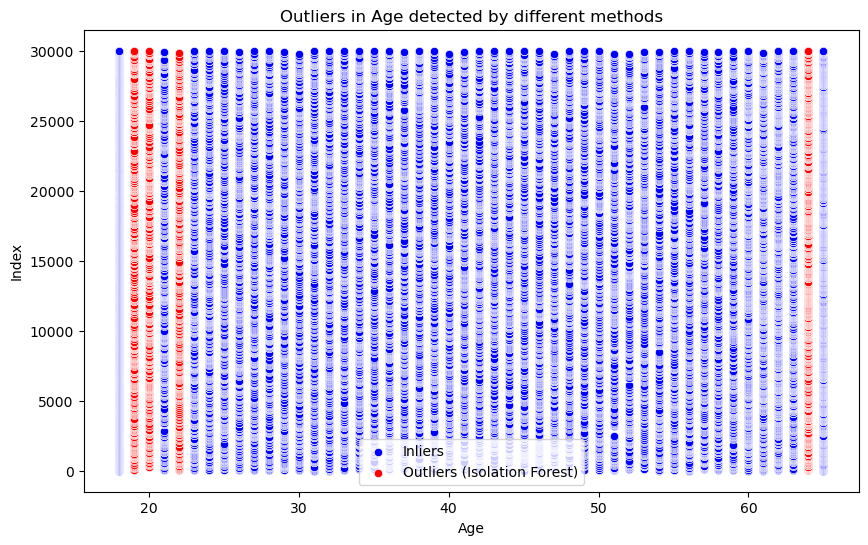

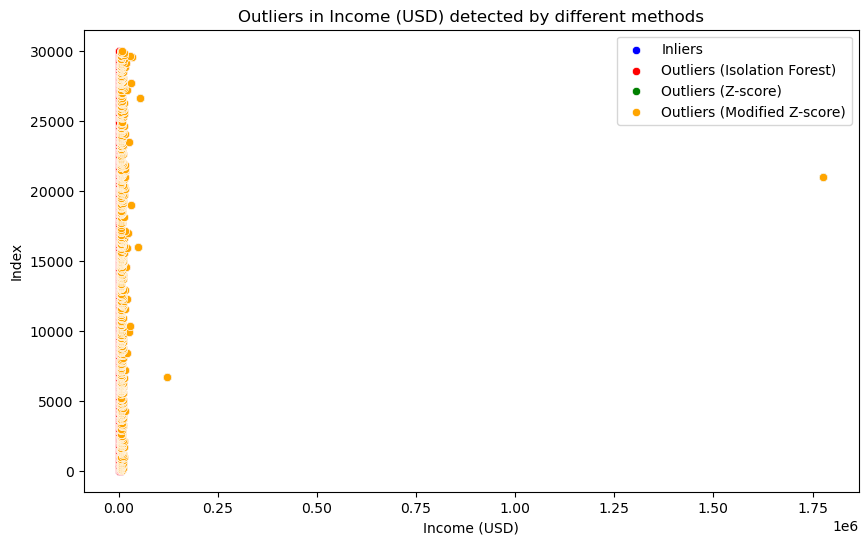

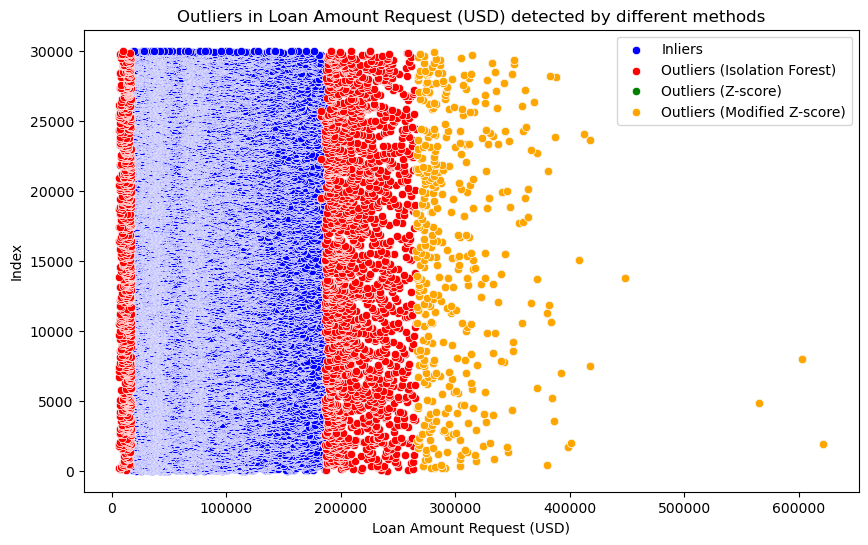

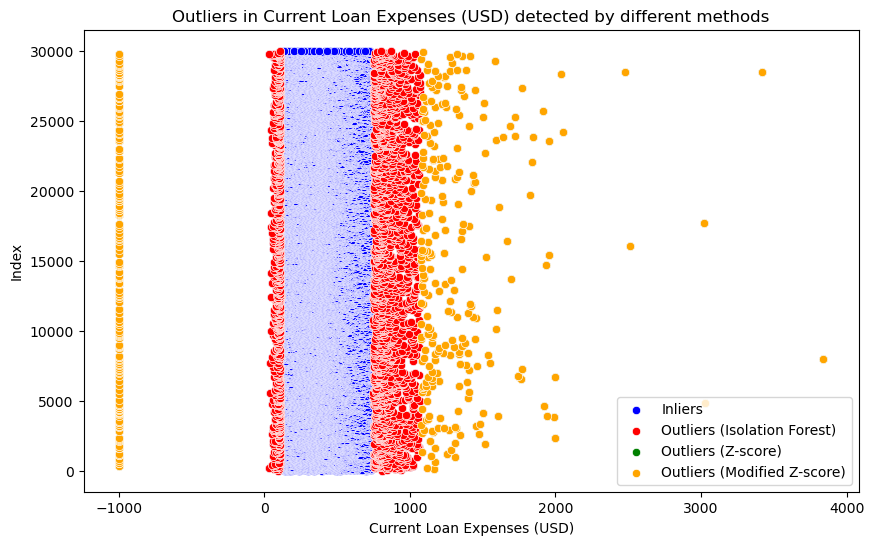

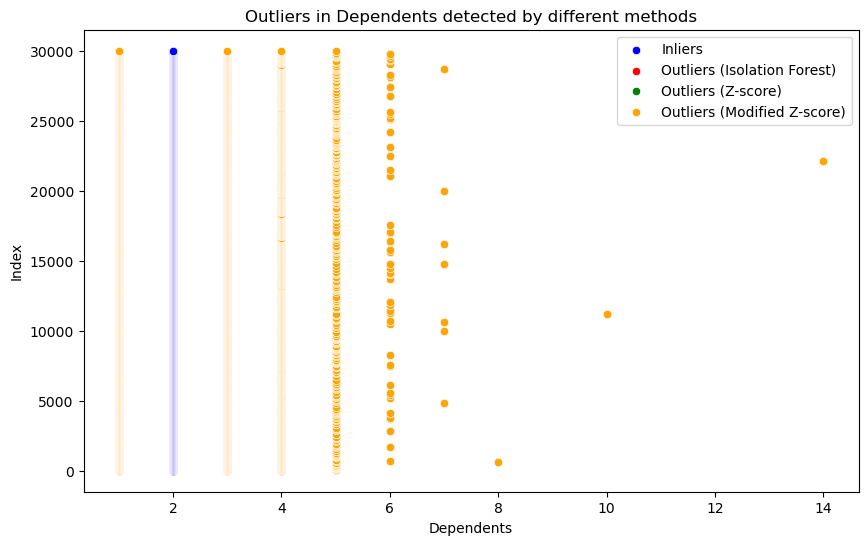

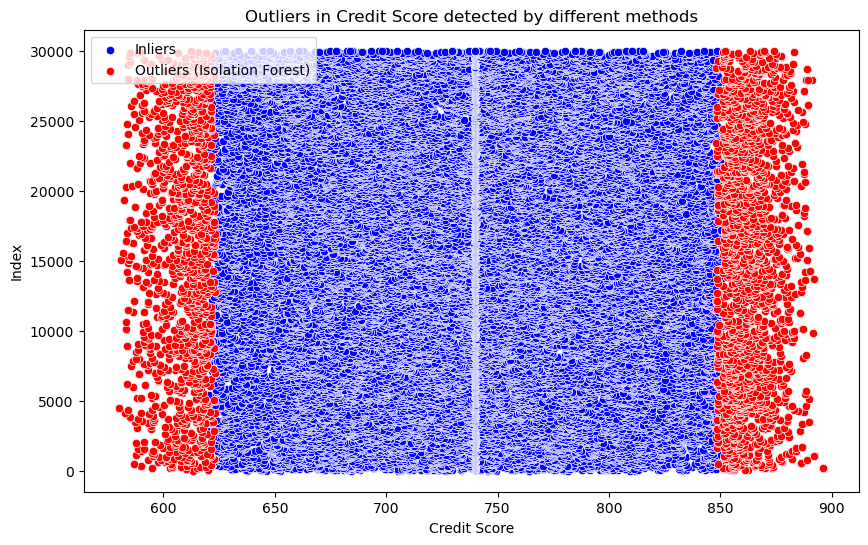

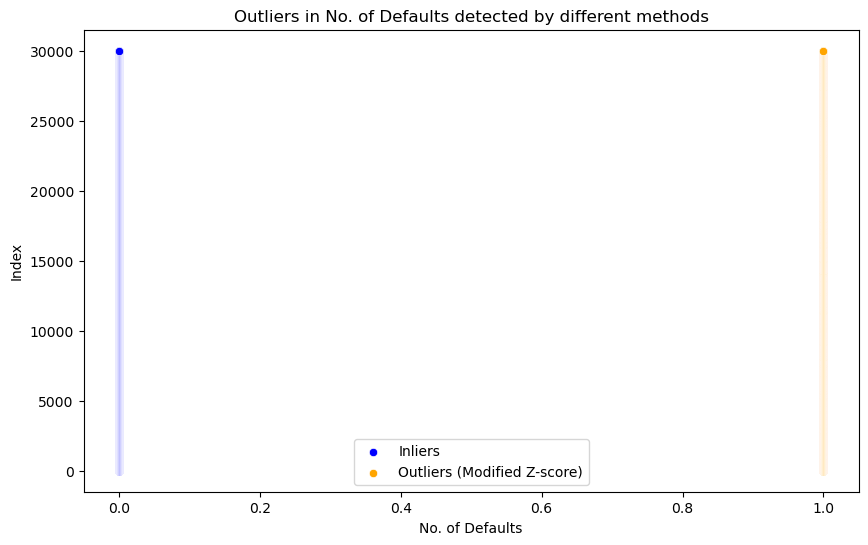

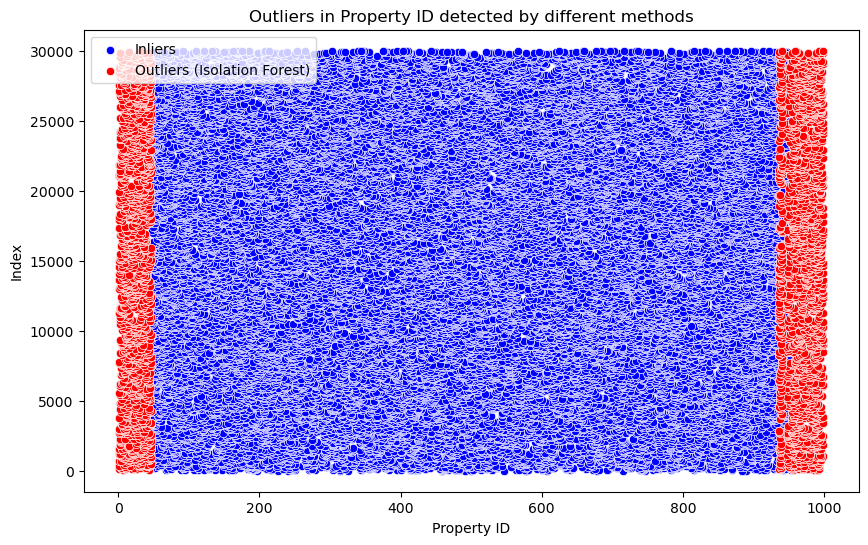

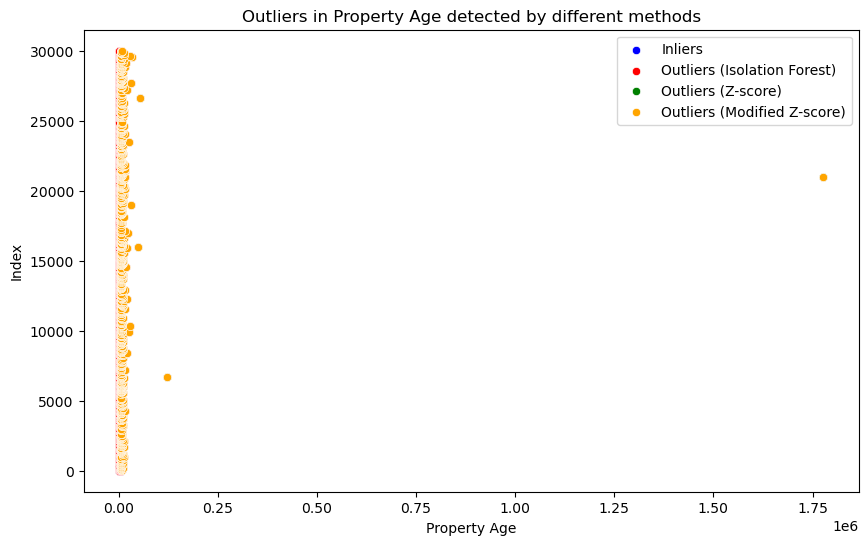

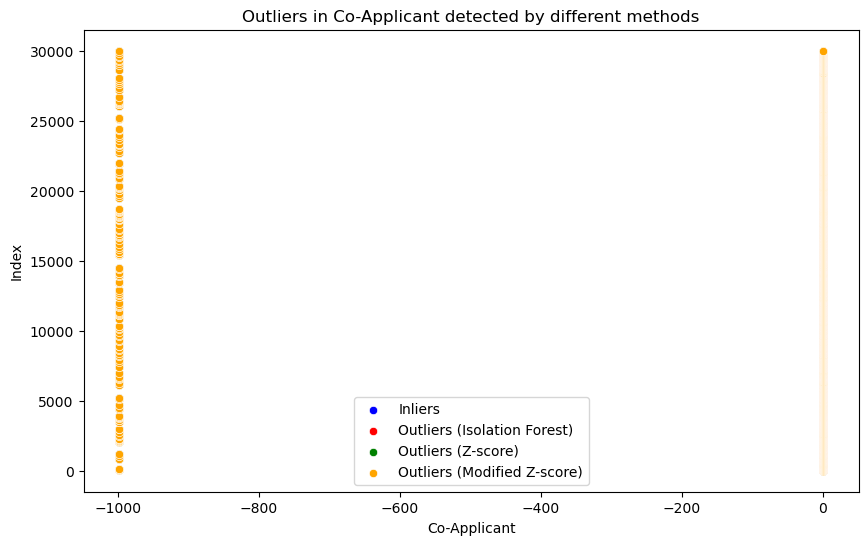

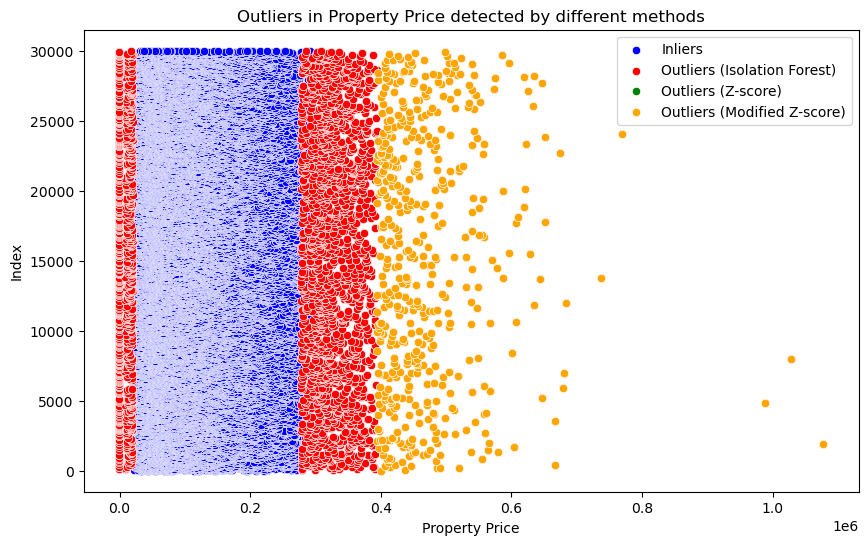

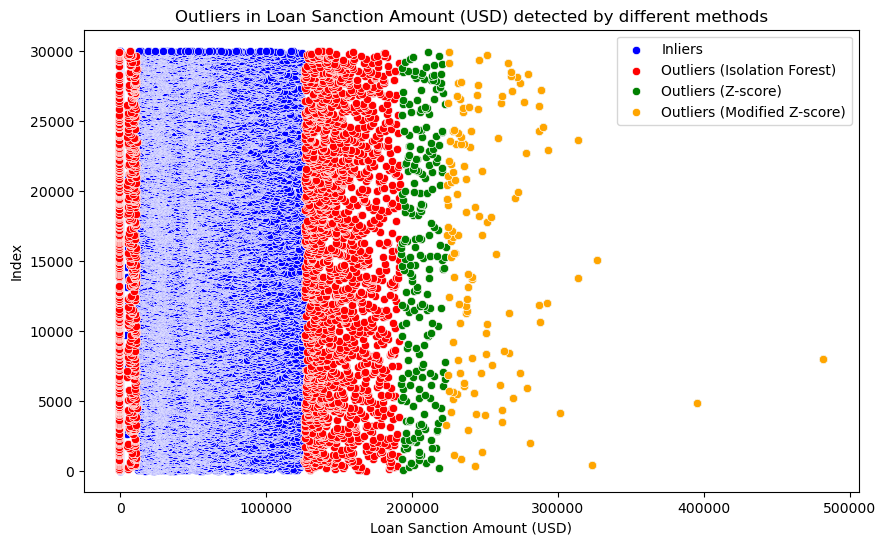

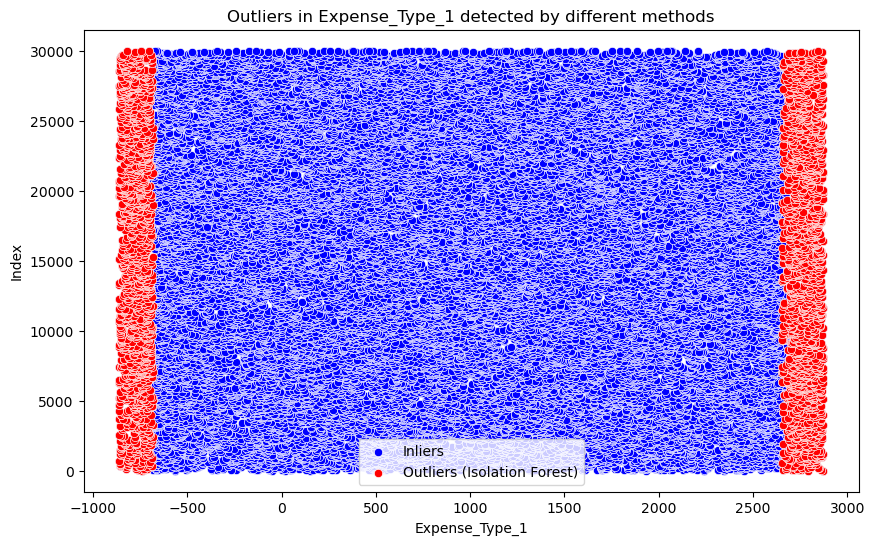

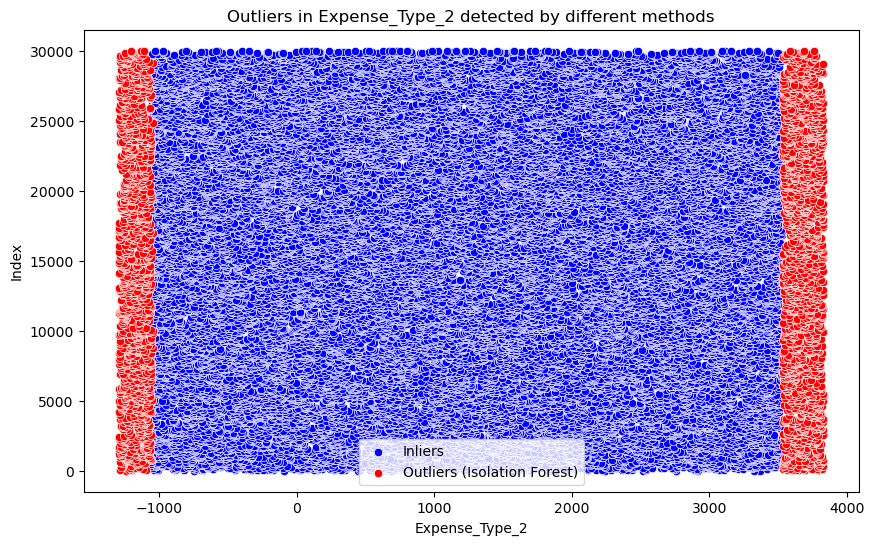

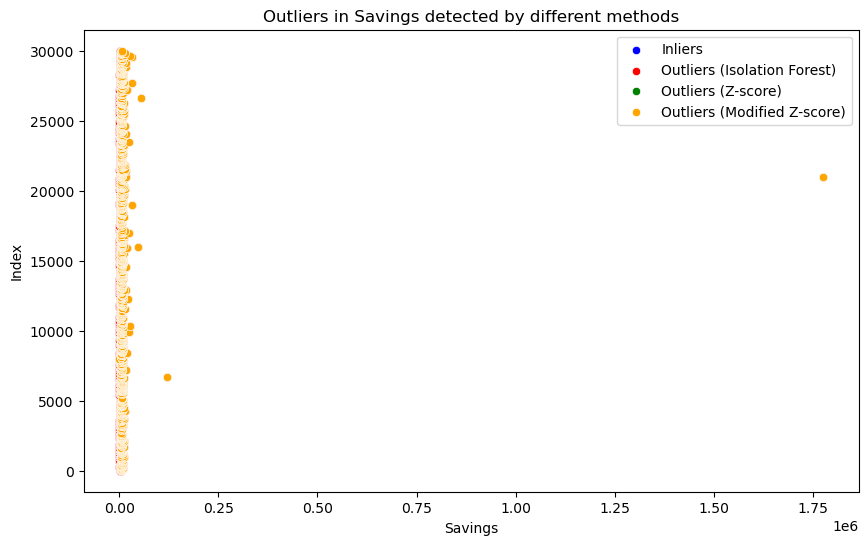

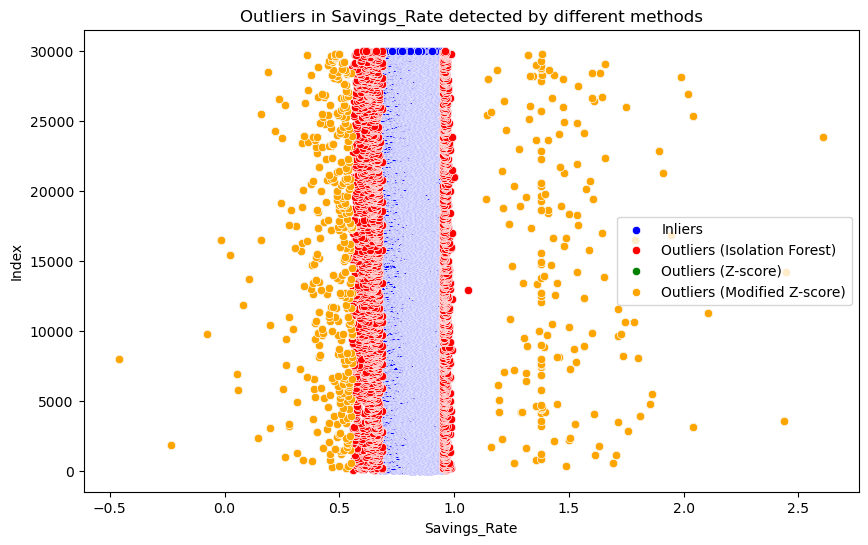

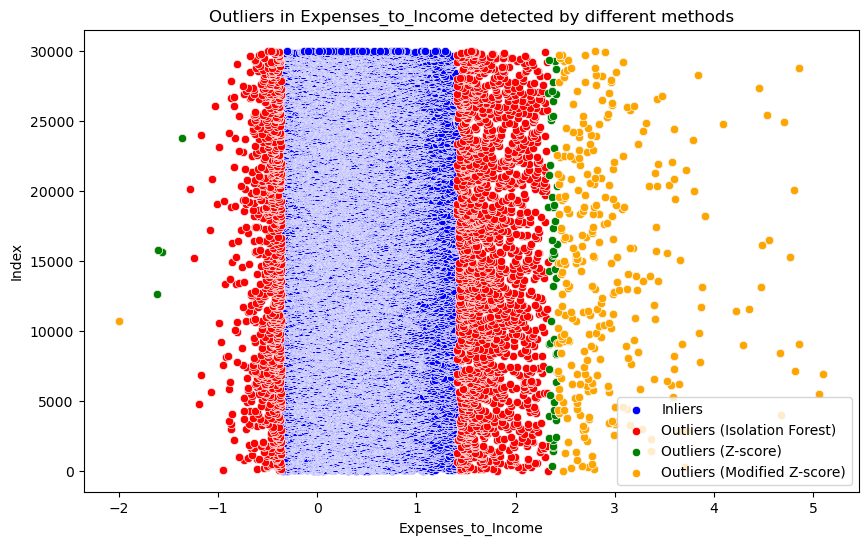

In [236]:
for column in df_imputed.columns:
    if df_imputed[column].dtype in [np.int64, np.float64]:
        plot_outliers(column)


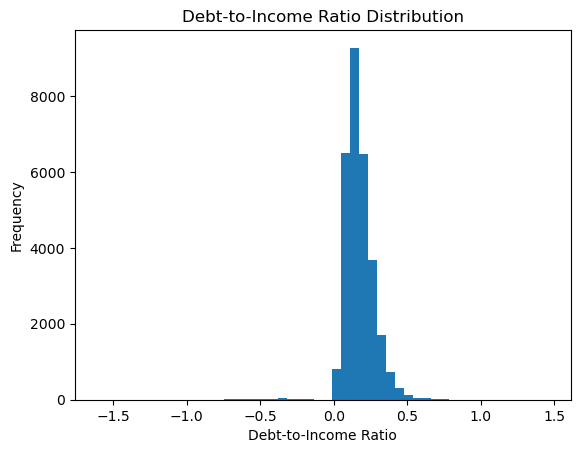

In [237]:
df['Debt_to_Income'] = df['Current Loan Expenses (USD)'] / df['Income (USD)']

plt.hist(df['Debt_to_Income'], bins=50)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Debt-to-Income Ratio Distribution')
plt.show()

In [238]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Harshit\\Downloads\\Loan 2.csv")
def calculate_savings(row):
    income = row['Income (USD)']
    expense_type_1 = row['Expense Type 1']
    expense_type_2 = row['Expense Type 2']
    expense_value = row['Current Loan Expenses (USD)']
    
    if expense_type_1 == 'y':
        return income - expense_value - row['Current Loan Expenses (USD)']
    elif expense_type_2 == 'y':
        return income - expense_value - row['Current Loan Expenses (USD)']
    else:
        return income - row['Current Loan Expenses (USD)']

df['Savings'] = df.apply(calculate_savings, axis=1)



In [239]:
df.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  No. of Defaults Has Active Credit Card Property ID  Property Age  \
0  ...                0                    NaN         746       1933.05   
1  ...                0            Unpossessed         608       4952.91   
2  ...                0            Unpossessed         546        988.19   
3  ...                1            Unpossessed         890           NaN   
4  ...                1                 Active         715       2614.77   

   Property Type  Property Location Co-Applicant  Property Price  \
0              4              Rural            1       119933.46   
1              2              Rural            1        54791.00   
2              2              Urban            0        72440.58   
3              2         Semi-Urban            1       121441.51   
4              4         Semi-Urban            1       208567.91   

   Loan Sanction Amount (USD)  Savings  
0                    54607.18  1691.97  
1                    37469.98  4457.10  
2                    36474.43   816.24  
3                    56040.54      NaN  
4                    74008.28  2123.36  

[5 rows x 25 columns]

C:\Users\Harshit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Segmentation Analysis:
         Income (USD)  Expense_Type_1  Expense_Type_2       Savings        Age
Segment                                                                       
0        2.984325e+03     1373.796265     2570.006528  2.544272e+03  39.585838
1        2.418489e+03      525.394576      184.109918  2.030941e+03  25.577512
2        2.334669e+03      454.118303      190.341209  1.957745e+03  55.089009
3        1.777460e+06     2212.215124      683.823854  1.777069e+06  29.000000


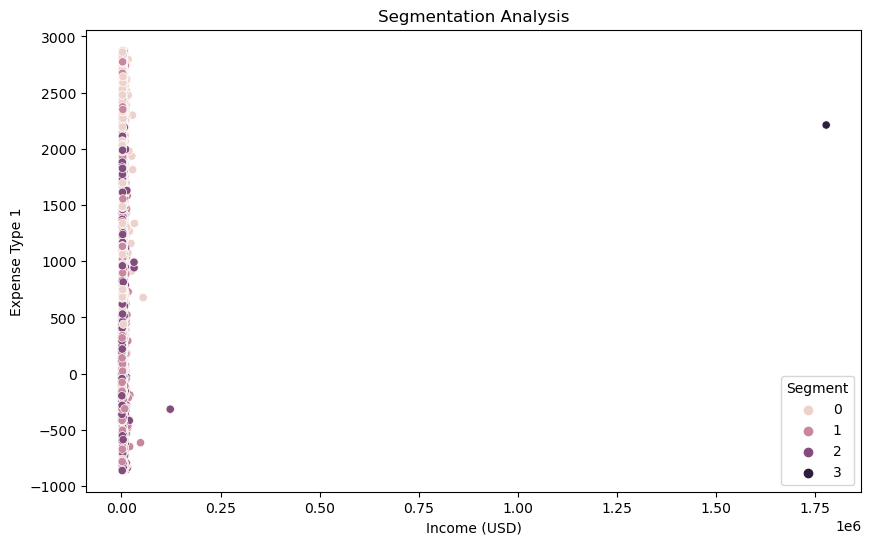


Segment Descriptions:
Segment 1: Income: $2984.33, Expense Type 1: $1373.80, Expense Type 2: $2570.01, Savings: $2544.27, Age: 39.59
Segment 2: Income: $2418.49, Expense Type 1: $525.39, Expense Type 2: $184.11, Savings: $2030.94, Age: 25.58
Segment 3: Income: $2334.67, Expense Type 1: $454.12, Expense Type 2: $190.34, Savings: $1957.75, Age: 55.09
Segment 4: Income: $1777460.21, Expense Type 1: $2212.22, Expense Type 2: $683.82, Savings: $1777069.28, Age: 29.00


In [240]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df['Expense_Type_1'] = df['Income (USD)'].apply(lambda x: generate_expense(x, expense_type_1_y_min, expense_type_1_y_max))
df['Expense_Type_2'] = df['Income (USD)'].apply(lambda x: generate_expense(x, expense_type_2_y_min, expense_type_2_y_max))


seg_cols = ['Income (USD)', 'Expense_Type_1', 'Expense_Type_2', 'Savings', 'Age']

imputer = SimpleImputer(strategy='mean')
df_imputed = df.copy()
df_imputed[seg_cols] = imputer.fit_transform(df[seg_cols])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed[seg_cols])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

labels = kmeans.labels_

df_imputed['Segment'] = labels

print("Segmentation Analysis:")
print(df_imputed.groupby('Segment').agg({'Income (USD)': 'mean', 'Expense_Type_1': 'mean', 'Expense_Type_2': 'mean', 'Savings': 'mean', 'Age': 'mean'}))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income (USD)', y='Expense_Type_1', hue='Segment', data=df_imputed)
plt.title("Segmentation Analysis")
plt.xlabel("Income (USD)")
plt.ylabel("Expense Type 1")
plt.legend(title="Segment")
plt.show()

segment_descriptions = []
for i in range(4):
    segment = df_imputed[df_imputed['Segment'] == i]
    description = f"Segment {i+1}: "
    description += f"Income: ${segment['Income (USD)'].mean():.2f}, "
    description += f"Expense Type 1: ${segment['Expense_Type_1'].mean():.2f}, "
    description += f"Expense Type 2: ${segment['Expense_Type_2'].mean():.2f}, "
    description += f"Savings: ${segment['Savings'].mean():.2f}, "
    description += f"Age: {segment['Age'].mean():.2f}"
    segment_descriptions.append(description)

print("\nSegment Descriptions:")
for desc in segment_descriptions:
    print(desc)
    
# Segment 1 has high income, high expenses, and low savings, indicating a group of customers who are big spenders.
# Segment 2 has moderate income, moderate expenses, and high savings, suggesting a group of customers who are savers.
# Segment 3 has low income, low expenses, and low savings, indicating a group of customers who are struggling financially.
# Segment 4 has high income, low expenses, and high savings, suggesting a group of customers who are financially secure.

In [241]:
df['Income Volatility'] = df['Income (USD)'].apply(lambda x: np.std(x) / np.mean(x))

Mean Squared Error: 817026604.1317804
R2 Score: 0.6446062748929438
  Customer ID               Name Gender   Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F  56.0   1933.050000              Low   
1     C-33999  America Calderone      M  32.0   4952.910000              Low   
2      C-3770      Rosetta Verne      F  65.0    988.190000             High   
3     C-26480         Zoe Chitty      F  65.0   2630.574417             High   
4     C-23459       Afton Venema      F  31.0   2614.770000              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working               Laborers  Semi-Urban                   46837.47   
2  Pensioner               Laborers  Semi-Urban                   45593.04   
3  Pensioner               Laborers       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban               

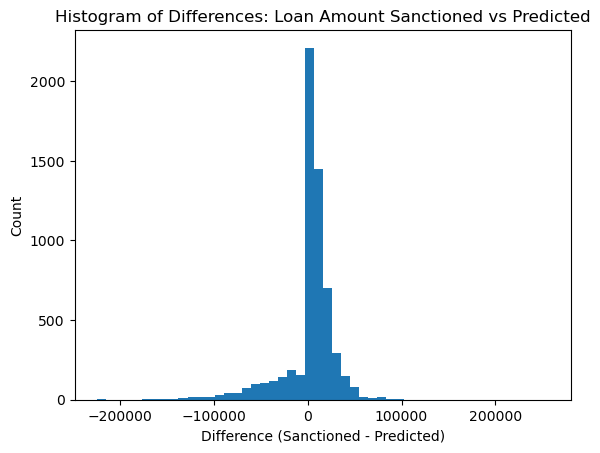

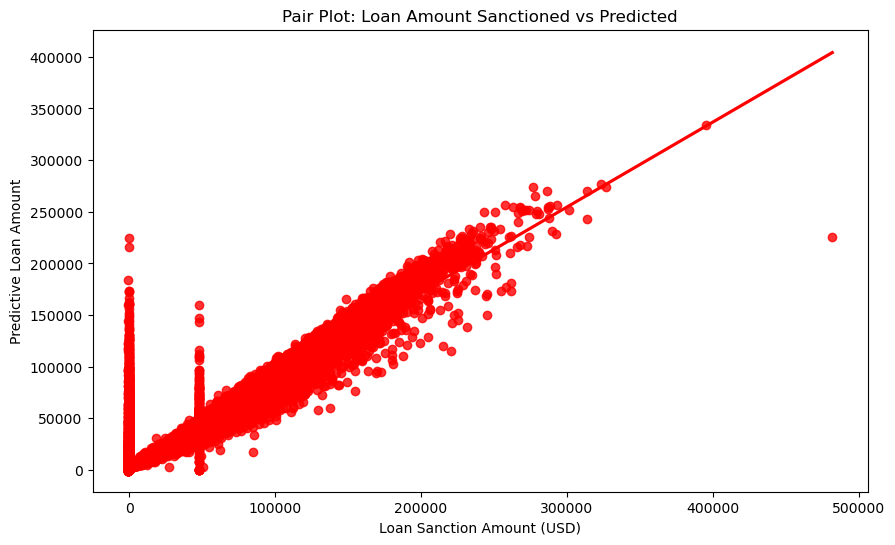

In [246]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

categorical_cols = ['Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location', 'Property Type']
numerical_cols = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'No. of Defaults', 'Property ID', 'Property Age', 'Property Price']

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])


target_imputer = SimpleImputer(strategy='mean')
df['Loan Sanction Amount (USD)'] = target_imputer.fit_transform(df[['Loan Sanction Amount (USD)']])


ohe = OneHotEncoder(handle_unknown='ignore')
categorical_transformer = ColumnTransformer(transformers=[('one_hot_encoder', ohe, categorical_cols)], remainder='passthrough')

scaler = StandardScaler()
numerical_transformer = ColumnTransformer(transformers=[('scaler', scaler, numerical_cols)], remainder='passthrough')


preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_cols),
    ('numerical', numerical_transformer, numerical_cols)
])


X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']
X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
df['Predictive Loan Amount'] = model.predict(preprocessor.transform(X))

diff = y_test - y_pred

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
print(df.head())


plt.hist(diff, bins=50)
plt.xlabel('Difference')
plt.ylabel('Count')
plt.title('Histogram of Differences: Loan Amount Sanctioned vs Predicted')
plt.show()

fig, axs = plt.subplots(figsize=(10, 6))
sns.regplot(x='Loan Sanction Amount (USD)', y='Predictive Loan Amount', data=df, ax=axs, color='red')
plt.title('Pair Plot: Loan Amount Sanctioned vs Predicted')
plt.show()



In [ ]:
import numpy as np
from scipy import stats


mean_diff = np.mean(diff)
std_diff = np.std(diff)

t_stat = mean_diff / (std_diff / np.sqrt(len(diff)))
p_value = stats.t.sf(np.abs(t_stat), len(diff) - 1)

print('Mean Difference:', mean_diff)
print('Standard Deviation of Differences:', std_diff)
print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('Reject the null hypothesis. The mean difference between the loan amount sanctioned and predicted is not zero.')
else:
    print('Fail to reject the null hypothesis. The mean difference between the loan amount sanctioned and predicted is zero.')


In [ ]:
import scipy.stats as stats

credit_score_high = df[df['Credit Score'] > 700]
credit_score_low = df[df['Credit Score'] < 600]
diff_high = credit_score_high['Loan Sanction Amount (USD)'] - credit_score_high['Predictive Loan Amount']
diff_low = credit_score_low['Loan Sanction Amount (USD)'] - credit_score_low['Predictive Loan Amount']
t_stat, p_value = stats.ttest_ind(diff_high, diff_low)
print('Hypothesis 4: Credit Score has a significant impact on Loan Approval')
print('t-statistic:', t_stat)
print('p-value:', p_value)
if p_value < :
    print("Reject the null hypothesis; there is a significant difference between the loan sanction amounts for high and low credit scores.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the loan sanction amounts for high and low credit scores.")

In [ ]:
property_types = df['Property Type'].unique()
diff_property_types = []
for property_type in property_types:
    property_type_df = df[df['Property Type'] == property_type]
    diff_property_type = property_type_df['Loan Sanction Amount (USD)'] - property_type_df['Predictive Loan Amount']
    diff_property_types.append(diff_property_type)
f_stat, p_value = stats.f_oneway(*diff_property_types)
print('F-statistic:', f_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print("Reject the null hypothesis; there is a significant difference between the loan sanction amounts for high and low credit scores.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the loan sanction amounts for high and low credit scores.")


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


categorical_cols = ['Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location']
numerical_cols = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'No. of Defaults', 'Property ID', 'Property Age', 'Property Type', 'Property Price', 'Loan Sanction Amount (USD)']

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

ohe = OneHotEncoder(handle_unknown='ignore')
categorical_transformer = ColumnTransformer(transformers=[('one_hot_encoder', ohe, categorical_cols)], remainder='passthrough')

scaler = StandardScaler()
numerical_transformer = ColumnTransformer(transformers=[('scaler', scaler, numerical_cols)], remainder='passthrough')

preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_cols),
    ('numerical', numerical_transformer, numerical_cols)
])

X = preprocessor.fit_transform(df)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

df['Cluster'] = labels

silhouette = silhouette_score(X_pca, labels)
print('Silhouette Score:', silhouette)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Customer Segmentation using KMeans')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

cluster_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
cluster_df['Cluster'] = labels

for col in cluster_df.columns[:-1]:
    feature_values = [cluster_df[cluster_df['Cluster'] == i][col] for i in range(5)]
    f_stat, p_val = f_oneway(*feature_values)
    print(f'Feature: {col}, F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}')